# More linear regression algorithms

In this notebook, we're going to see lots of ways to do regression with `sklearn`.

In [44]:
import pandas as pd

df = pd.read_csv('https://geocomp.s3.amazonaws.com/data/RPC_4_lithologies_imputed.csv')

df

,RPC,Description,Lithology,Vp [m/s],Vs [m/s],Rho [g/cm³],pred
0,104818,KIAMICHI FORMA. 4,sandstone,3045.60,1595.70,2.108,0
1,104893,KIAMICHI REMOLD 3,sandstone,3000.60,1517.10,2.126,0
2,104652,NAVAJO ARCO 2,sandstone,3363.60,2041.50,2.162,0
3,104752,NAVAJO ARCO REMOL 1,sandstone,3195.30,1606.20,2.160,0
4,104598,FERRON 82-3 1677.5,sandstone,4237.50,2448.60,2.428,0
...,...,...,...,...,...,...,...
795,102178,R.PRICE 10909.5 #31,dolomite,4625.98,2759.19,2.370,0
796,102225,R.PRICE 10916.5 #38,dolomite,5446.19,3116.80,2.440,0
797,102088,R.PRICE 10883.5 #7,dolomite,5446.19,2998.69,2.570,0
798,102213,R.PRICE 10913.5 #35,dolomite,5347.77,2933.07,2.440,0


### EXERCISE

For this notebook, we want a fairly simple problem. That way, it will be easier to see how different algorithms perform. So we'll do some things differently from the previous linear regression notebook:

- We'll use only 100 training examples to make some of the model differences more obvious.
- We'll stick to the simple problem of predicting Vs from Vp and Rho. 
- We'll ditch the polynomial features.
- We'll dispense with pipeline and just standardize everything at the start.

Change the following code blocks to set up this task.

In [45]:
features = [🐍🐍🐍, 🐍🐍🐍]
X = df[🐍🐍🐍].values
y = df[🐍🐍🐍].values

X.shape

(800, 2)

In [45]:
features = ['Vp [m/s]', 'Rho [g/cm³]']
X = df[features].values
y = df['Vs [m/s]'].values

X.shape

(800, 2)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(🐍🐍🐍, 🐍🐍🐍, test_size=🐍🐍🐍, random_state=🐍🐍🐍)

X_train.shape, y_train.shape

((400, 2), (400,))

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

X_train.shape, y_train.shape

((400, 2), (400,))

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(🐍🐍🐍)

🐍🐍🐍 = scaler.transform(🐍🐍🐍)
🐍🐍🐍 = scaler.transform(🐍🐍🐍)

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

### EXERCISE

When we make plots, we'll have to just look at one feature at a time.

Plot the training data and the validation data together:

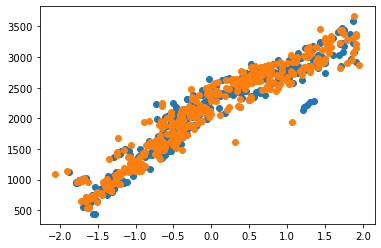

In [53]:
import matplotlib.pyplot as plt

plt.scatter(🐍🐍🐍, 🐍🐍🐍)
plt.scatter(🐍🐍🐍, 🐍🐍🐍)

And here's the scoring function we made before:

In [55]:
from sklearn.metrics import r2_score, mean_squared_error
from collections import namedtuple
import numpy as np

def rmse_score(y_true, y_predicted):
    """
    Example
        >>> rmse_score([1, 14], [5, 10])
        4.0
    """
    y_true, y_predicted = np.asarray(y_true), np.asarray(y_predicted)
    return np.sqrt(np.mean((y_true - y_predicted)**2))

def score(y_true, y_predicted):
    """
    Return the R2 and RMSE scores for a regression.
    
    Args:
        y_true (array): The true values, e.g. y_val or y_test.
        y_predicted (array): The predicted values.
        
    Returns:
        tuple: The R2 score and the RMSE.
        
    Example:
        >>> score([0.5, 1.5, 2.5], [0.5, 1.5, 2.5])
        Score(R2=1.0, RMSE=0.0)
        >>> score([0.5, 1.5, 2.5], [0.4, 1.5, 2.6])
        Score(R2=0.99, RMSE=0.08164965809277262)
    """
    r2 = r2_score(y_true, y_predicted)
    rmse = rmse_score(y_true, y_predicted)
    
    result = namedtuple('Score', ['R2', 'RMSE'])
    
    return result(r2, rmse)

## Linear regression by OLS

As a reminder, here's the one we've already seen:

Score(R2=0.9251000823317641, RMSE=205.31001005276474)

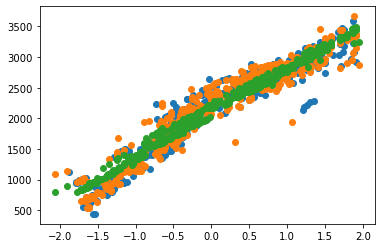

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

## K-nearest neighbours regressor

Analogous to the way a KNN classifies points by looking at mode average of the `k` nearest neighbouring points, the regressor takes the mean average of the neighbours. Optionally, you can weight the points in the neighborhood by their distance from the target, passing in a custom weighting function if you wish.

Score(R2=0.9492639946229497, RMSE=168.97699767828016)

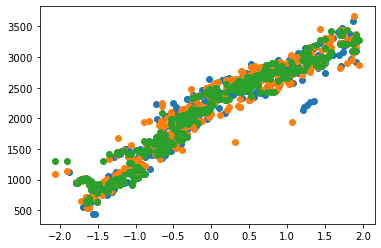

In [75]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

I found the weighting makes little difference:

In [76]:
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
score(y_val, y_pred)

Score(R2=0.9468764794072547, RMSE=172.9071205601768)

## Support vector machine

This model is maybe not all that intuitive, but I found the figure here helpful https://stats.stackexchange.com/questions/82044/how-does-support-vector-regression-work-intuitively


(0.8694572832664759, 268.7115746364607)

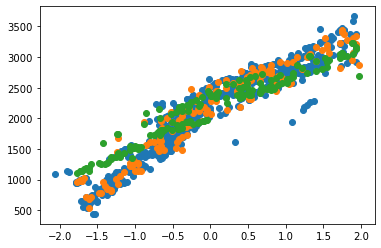

In [31]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

### EXERCISE

Try changing the kernel to `rbf` and then changing the value for `C`, the regularization parameter.

In [ ]:
# YOUR CODE HERE


Score(R2=0.15089847337526818, RMSE=691.272475661086)

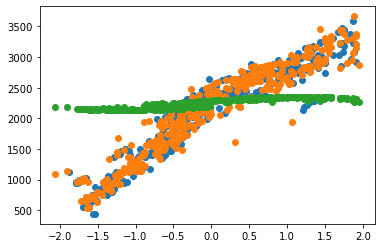

In [78]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

Score(R2=0.9431521940348214, RMSE=178.86538760655898)

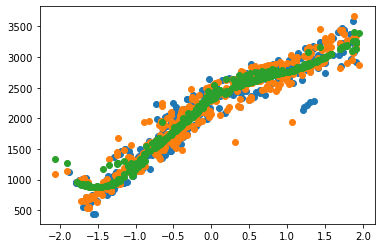

In [79]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

(-8.300158412561949, 2268.0635736818817)

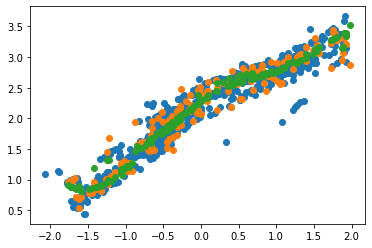

In [43]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=1)
model.fit(X_train, y_train/1000)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train/1000)
plt.scatter(X_val[:, 0], y_val/1000)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

### EXERCISE

Try some more models. Most of them follow exactly the same pattern as the one we've been using so far. 

Here are some of the main ones to focus on, along with the most important parameters:

- [`sklearn.gaussian_process.GaussianProcessRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html) — `alpha`
- [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) — `max_depth`, `max_features`, `min_samples_leaf`
- [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) — `max_depth`, `max_features`, `min_samples_leaf`
- [`sklearn.neural_network.MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) — `alpha`, `activation`, `hidden_layer_sizes`, `learning_rate_init`

There are lots of others, check [the `sklearn` docs](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) for regressors.

In [80]:
# YOUR CODE HERE



---

&copy; 2022 Agile Scientific